# DTSA 5510 Unsupervised Learning Final Project

This project will aim to group mall customers into clusters. There are no labels in the dataset so this is an entirely unsupervised learning problem. We will be using both K Means Clustering and Hierarchical Clustering to solve our problem.

The dataset is from Kaggle.
Choudhary, V. (2018, August 11). Mall Customer Segmentation Data. Kaggle. Retrieved April 10, 2022, from https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python 

Let's first import pandas and change directory to where dataset .csv file is located.

In [1]:
import pandas as pd

In [2]:
cd Downloads

/Users/richard/Downloads


In [3]:
df = pd.read_csv('Mall_Customers.csv')

There are 200 samples and 5 columns.

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


According to the Kaggle page, here are the columns along with their descriptions.

* **CustomerID** - Unique ID assigned to the customer

* **Gender** - Gender of the customer

* **Age** - Age of the customer

* **Annual Income (k$)** - Annual Income of the customer

* **Spending Score (1-100)** - Score assigned by the mall based on customer behavior and spending nature

Specific statistics by column.

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
import seaborn as sns

This boxplot shows the min age to be 18 as indicated by the left whisker and max to be 70 as indicated by the right whisker. It also shows median to be 36.

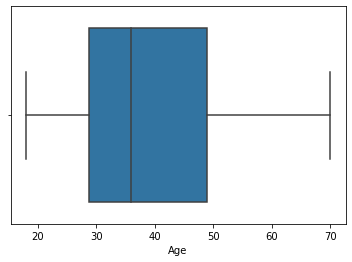

In [7]:
sns.boxplot(x=df['Age']);

We can see a pretty balanced dataset. Around 80 male and 100 female.

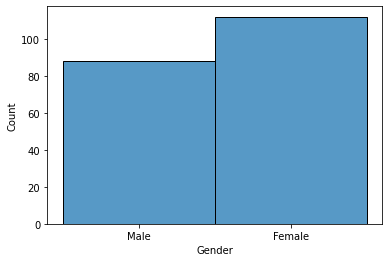

In [8]:
sns.histplot(df['Gender']);

Scatterplot shows that as the CustomerID goes up, so does Annual Income (k$).

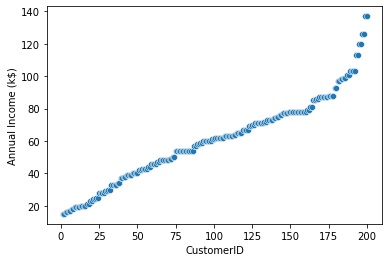

In [9]:
sns.scatterplot(x=df['CustomerID'],y=df['Annual Income (k$)']);

Boxplot shows Spending Score (1-100) go from a min of 1 to a max of 99. Median of 50.

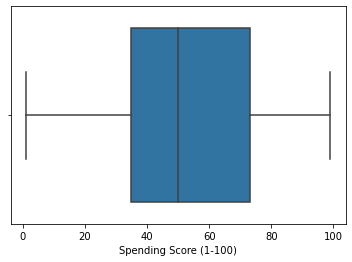

In [10]:
sns.boxplot(x=df['Spending Score (1-100)']);

As mentioned before, Annual Income and CustomerID are highly correlated. 0.977548 to be exact.

In [11]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


There seems to be no missing values in the data. All columns are ints except for Gender, which is an object datatype.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Let's convert the Gender column to be dummies. We will also drop the first column since if we know it's 1 in one column, it's gotta be 0 in the other. We convert Gender to dummies since we need all data to be numerical to use a clustering method.

In [13]:
pd.get_dummies(df['Gender'],drop_first=True)

,Male
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [14]:
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)

In [44]:
# keep CustomerID column in customer variable so we can add it back later when we evaluate the model
customer = df['CustomerID']

We will drop CustomerID column since it adds no value to the model. Also, it is highly correlated to the Annual Income feature. We can add CustomerID back at the end when we analyze our results.

In [16]:
df = df.drop('CustomerID',axis=1)

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Time to scale our data. We will use StandardScaler over MinMaxScaler because we want all of the columns to have the same mean and variance (mean to be 0 and variance 1). This will make sure that the model doesn't think one feature means more than the other just because of the range of values.

In [18]:
scaler = StandardScaler()

In [19]:
scaled_df = scaler.fit_transform(df)

In [20]:
from sklearn.cluster import KMeans

Let's see what to use as our n_clusters.

In [21]:
# this code block will record the inertia for all n_clusters between 1 and 20
# make random_state equal to 50 so we can evaulate and compare inertias more fairly
inertia = []
k = range(1,20)
for a in k:
    model = KMeans(a,random_state=50)
    model.fit(scaled_df)
    inertia.append(model.inertia_)

In [22]:
inertia

[800.0000000000003,
 588.8026767824932,
 476.86006878694354,
 386.7147857740689,
 327.413194546316,
 276.18291622947805,
 236.69287877100794,
 199.78478208926091,
 174.23547730691482,
 152.7057441850047,
 142.78348146204112,
 128.02189668187034,
 117.53872070122515,
 107.14664003399588,
 101.04532500781077,
 96.02243275202446,
 88.43297804564706,
 84.42216904075485,
 79.63458876407445]

In [23]:
import numpy as np
np.diff(inertia)

array([-211.19732322, -111.942608  ,  -90.14528301,  -59.30159123,
        -51.23027832,  -39.49003746,  -36.90809668,  -25.54930478,
        -21.52973312,   -9.92226272,  -14.76158478,  -10.48317598,
        -10.39208067,   -6.10131503,   -5.02289226,   -7.58945471,
         -4.010809  ,   -4.78758028])

In [24]:
import matplotlib.pyplot as plt

The elbow method says that we should choose a value where the y-axis decreases much less than before as you increase x. After taking a look at the differences between inertias, and the plot below, 7 seems to be the number of clusters we should choose. Since K Means is an Unsupervised method and we have an Unsupervised Learning problem, this would be our form of measuring model performance.

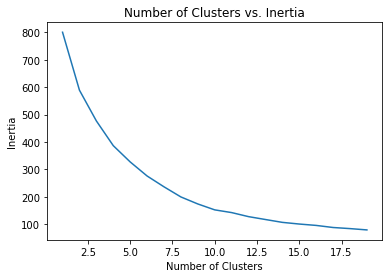

In [25]:
# plot of the number of clusters on the x-axis and inertia on the y-axis using matplotlib
plt.plot(k,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Number of Clusters vs. Inertia');

Let's create and fit our model.

In [26]:
model = KMeans(7)

In [27]:
model.fit(scaled_df)

KMeans(n_clusters=7)

The following are the labels that the model found for each datapoint.

In [28]:
model.labels_

array([4, 4, 2, 2, 2, 2, 6, 2, 0, 2, 0, 2, 6, 2, 4, 4, 2, 4, 0, 2, 4, 4,
       6, 4, 6, 4, 6, 4, 6, 2, 0, 2, 0, 4, 6, 2, 6, 2, 6, 2, 6, 4, 0, 2,
       6, 2, 6, 2, 2, 2, 6, 4, 2, 0, 6, 0, 6, 0, 2, 0, 0, 4, 6, 6, 0, 4,
       6, 6, 4, 2, 0, 6, 6, 6, 0, 4, 6, 4, 2, 6, 0, 4, 0, 6, 2, 0, 6, 2,
       2, 6, 6, 4, 0, 6, 2, 4, 6, 2, 0, 4, 2, 6, 0, 4, 0, 2, 6, 0, 0, 0,
       0, 2, 6, 4, 2, 2, 6, 6, 6, 6, 4, 6, 1, 5, 3, 1, 0, 5, 0, 5, 0, 5,
       3, 1, 3, 1, 3, 5, 3, 1, 6, 5, 3, 1, 3, 5, 0, 1, 3, 5, 3, 5, 3, 1,
       3, 1, 3, 1, 3, 1, 6, 1, 3, 1, 0, 1, 3, 1, 3, 5, 3, 5, 3, 5, 3, 1,
       0, 5, 0, 5, 3, 1, 3, 1, 3, 5, 3, 5, 3, 1, 3, 1, 3, 1, 3, 1, 3, 5,
       3, 5], dtype=int32)

In [29]:
# create new column called "KMeans Label"
df['KMeans Label'] = model.labels_

In [30]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans Label
0,1,19,15,39,4
1,1,21,15,81,4
2,0,20,16,6,2
3,0,23,16,77,2
4,0,31,17,40,2


In [31]:
# bring back CustomerID column so we can see which customers are grouped together
df['CustomerID'] = customer

In [32]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans Label,CustomerID
0,1,19,15,39,4,1
1,1,21,15,81,4,2
2,0,20,16,6,2,3
3,0,23,16,77,2,4
4,0,31,17,40,2,5


In [33]:
# rearrange df so CustomerID is the first column
df = df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'KMeans Label']]

In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans Label
0,1,1,19,15,39,4
1,2,1,21,15,81,4
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2


Let's take a look at all of the points where the KMeans Label is 1. Gender is equal to 0, meaning everyone is Female. Age seems to be in the 30s for the most part. Annual Income looks to go from around 70 to 120.

In [35]:
df[df['KMeans Label']==1]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans Label
122,123,0,40,69,58,1
125,126,0,31,70,77,1
133,134,0,31,72,71,1
135,136,0,29,73,88,1
139,140,0,35,74,72,1
143,144,0,32,76,87,1
147,148,0,32,77,74,1
153,154,0,38,78,76,1
155,156,0,27,78,89,1
157,158,0,30,78,78,1


Time to do Hierarchical Clustering.

In [36]:
from sklearn.cluster import AgglomerativeClustering

We will keep number of clusters to be 7 so we can compare the clusters of the two models on the same transformed dataset.

In [37]:
hierarchical = AgglomerativeClustering(7)

In [38]:
hierarchical.fit(scaled_df)

AgglomerativeClustering(n_clusters=7)

In [39]:
hierarchical.labels_

array([2, 2, 3, 1, 3, 1, 3, 1, 4, 1, 4, 1, 3, 1, 2, 2, 3, 2, 4, 1, 2, 2,
       3, 2, 3, 2, 3, 2, 3, 1, 4, 1, 4, 2, 3, 1, 3, 1, 3, 1, 3, 2, 4, 1,
       3, 1, 3, 1, 1, 1, 3, 2, 1, 4, 3, 4, 3, 4, 1, 4, 4, 2, 3, 3, 4, 2,
       3, 3, 2, 1, 4, 3, 3, 3, 4, 2, 3, 4, 1, 3, 4, 4, 4, 3, 1, 4, 3, 1,
       1, 3, 3, 2, 4, 1, 1, 2, 3, 1, 4, 2, 1, 3, 4, 2, 4, 1, 3, 4, 4, 4,
       4, 1, 1, 2, 1, 1, 3, 3, 3, 3, 2, 1, 1, 5, 1, 6, 4, 5, 0, 5, 0, 5,
       1, 6, 0, 6, 0, 5, 0, 6, 0, 5, 1, 6, 0, 5, 4, 6, 0, 5, 0, 5, 0, 6,
       0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 5, 0, 5, 0, 5, 0, 6,
       0, 5, 0, 5, 0, 6, 0, 6, 0, 5, 0, 5, 0, 6, 0, 6, 0, 6, 0, 6, 0, 5,
       0, 5])

In [40]:
# create new column called "Hierarchical Label"
df['Hierarchical Label'] = hierarchical.labels_

In [41]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans Label,Hierarchical Label
0,1,1,19,15,39,4,2
1,2,1,21,15,81,4,2
2,3,0,20,16,6,2,3
3,4,0,23,16,77,2,1
4,5,0,31,17,40,2,3


It seems when the hierarchical label equals to 1, it represents when the kmeans label equals to 2.

In [42]:
df[df['Hierarchical Label']==1]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans Label,Hierarchical Label
3,4,0,23,16,77,2,1
5,6,0,22,17,76,2,1
7,8,0,23,18,94,2,1
9,10,0,30,19,72,2,1
11,12,0,35,19,99,2,1
13,14,0,24,20,77,2,1
19,20,0,35,23,98,2,1
29,30,0,23,29,87,2,1
31,32,0,21,30,73,2,1
35,36,0,21,33,81,2,1


In [43]:
df[df['KMeans Label']==2]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans Label,Hierarchical Label
2,3,0,20,16,6,2,3
3,4,0,23,16,77,2,1
4,5,0,31,17,40,2,3
5,6,0,22,17,76,2,1
7,8,0,23,18,94,2,1
9,10,0,30,19,72,2,1
11,12,0,35,19,99,2,1
13,14,0,24,20,77,2,1
16,17,0,35,21,35,2,3
19,20,0,35,23,98,2,1


With our goal being solely to group the datapoints into clusters, we are finished. We do not have to do a typical checking metrics to see performance because we are doing an unsupervised learning problem. Our form of performance came above when we took a look at what is the best number of clusters based on the elbow method. We found the 7 clusters using both k means and hierarchical clustering. Both models seemed to be clustering similarly based on comparing when hierarchical's label is equal to 1, k means seem to be 2 for the most part. In order for the hierarchical model to do even better at clustering, we can play around with linkage, affinity, and distance threshold. In our project, we just left it to all of the defaults. If we had labels and we were trying to see how well the model would do without knowing any of the labels, tinkering with the hyperparameters more would have helped improve accuracy and other performance metrics.